In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from dotenv import load_dotenv
import os

load_dotenv()

plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = os.environ.get("FRED_API_SECRET_KEY")

# 1. Create the Fred object

In [2]:
fred = Fred(api_key=fred_key)

# 2. Search for economic data

In [3]:
sp_search = fred.search("S&P", order_by="popularity")

In [4]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-09-06,2025-09-06,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-09-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-09-05 08:42:06-05:00,97,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2025-09-06,2025-09-06,S&P 500,2015-09-08,2025-09-05,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-09-05 19:02:02-05:00,90,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2025-09-06,2025-09-06,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-08-26 08:12:01-05:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-09-06,2025-09-06,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-09-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-09-05 08:42:10-05:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-09-06,2025-09-06,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-09-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-09-05 08:52:02-05:00,83,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# 3. Pull RAW data & Plot

<Axes: title={'center': 'S&P 500'}>

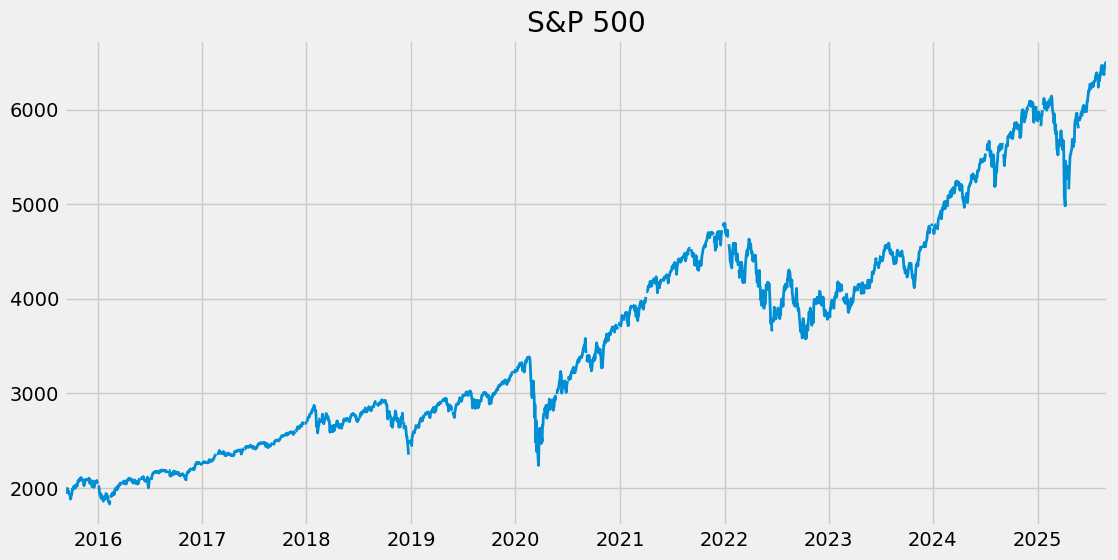

In [5]:
sp500 = fred.get_series(series_id="SP500")
sp500.plot(figsize=(12, 6), title="S&P 500", lw=2)

# 4. Pull and Join Multiple Data Series

In [ ]:
# uemp_results = fred.search("unemployment")

In [ ]:
# unrate = fred.get_series(series_id="UNRATE")

<Axes: >

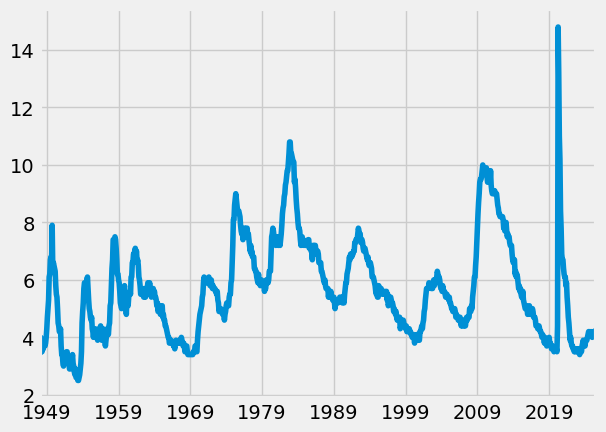

In [8]:
# unrate.plot()

In [9]:
unemp_df = fred.search("unemployment rate state", filter=("frequency", "Monthly"))

In [11]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-09-06,2025-09-06,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:01-05:00,98,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-09-06,2025-09-06,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-09-05 07:50:03-05:00,61,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-09-06,2025-09-06,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,75,The series comes from the 'Current Population ...
U6RATE,U6RATE,2025-09-06,2025-09-06,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,74,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2025-09-06,2025-09-06,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-09-05 07:50:08-05:00,35,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCHAYW7LFN,NCHAYW7LFN,2025-09-06,2025-09-06,"Civilian Labor Force in Haywood County, NC",1990-01-01,2025-07-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-08-27 10:35:36-05:00,1,These data come from the Current Population Su...
MICALH5LFN,MICALH5LFN,2025-09-06,2025-09-06,"Civilian Labor Force in Calhoun County, MI",1990-01-01,2025-07-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-08-27 10:33:17-05:00,1,These data come from the Current Population Su...
KYTRLFN,KYTRLFN,2025-09-06,2025-09-06,"Civilian Labor Force in Trigg County, KY",1990-01-01,2025-07-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-08-27 10:33:36-05:00,1,These data come from the Current Population Su...


In [12]:
unemp_df = unemp_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")] # contains "Unemployment Rate" metadata

In [13]:
len(unemp_df.index)

58

In [14]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'LNS14000024', 'CAUR', 'LNS14024887', 'U2RATE',
       'TXUR', 'NYUR', 'M0892AUSM156SNBR', 'FLUR', 'M0892BUSM156SNBR',
       'LNS14000003', 'LNS14000002', 'LNS14000009', 'LNS14027662',
       'LNS14000031', 'LNS14000036', 'LNS14027660', 'LNS14000012',
       'LNS14000001', 'VAUR', 'MIUR', 'OHUR', 'ALUR', 'PAUR', 'MAUR', 'GAUR',
       'ILUR', 'LNS14000060', 'NCUR', 'COUR', 'NJUR', 'DCUR', 'NVUR',
       'LNS14027659', 'WIUR', 'LNS14000032', 'WAUR', 'LNS14032183', 'ORUR',
       'AZUR', 'TNUR', 'KYUR', 'IDUR', 'SCUR', 'INUR', 'MNUR',
       'LASMT261982000000003', 'LAUR', 'WVUR', 'PRUR', 'NMUR', 'MDUR',
       'LNS14000028', 'LNS14000025', 'IAUR', 'MOUR', 'MSUR'],
      dtype='object', name='series id')

In [15]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [16]:
type(all_results)

list

In [17]:
unemp_df.loc["LASMT261982000000003", "title"]

'Unemployment Rate in Detroit-Warren-Dearborn, MI (MSA)'

In [104]:
rows_to_exclude = unemp_df.index.str.contains("LNS|M0892|LASMT261982000000003")

series_id_not_of_state = unemp_df[rows_to_exclude]
type(series_id_not_of_state)

pandas.core.frame.DataFrame

In [105]:
uemp_results = pd.concat(all_results, axis=1).drop(series_id_not_of_state.index, axis=1)

<Axes: >

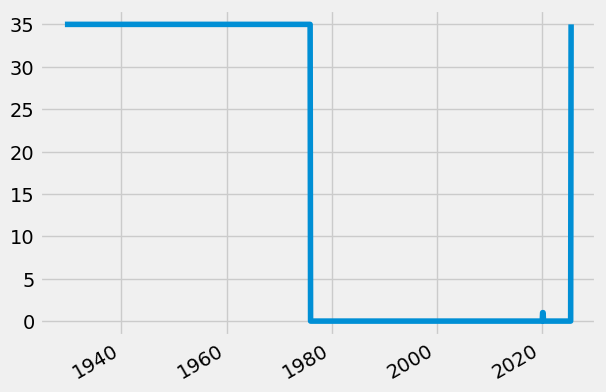

In [106]:

uemp_states = uemp_results.drop(["UNRATE", "U2RATE"], axis=1)
uemp_states.isna().sum(axis=1).plot()

In [107]:
uemp_states = uemp_states.dropna()

id_to_state = unemp_df.loc[~rows_to_exclude, "title"].str.replace("Unemployment Rate in ", "").str.strip().str.title().to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [109]:
# plot states unemployment rates
px.line(uemp_states)

## Pull May 2020 Unemployment Rate per State

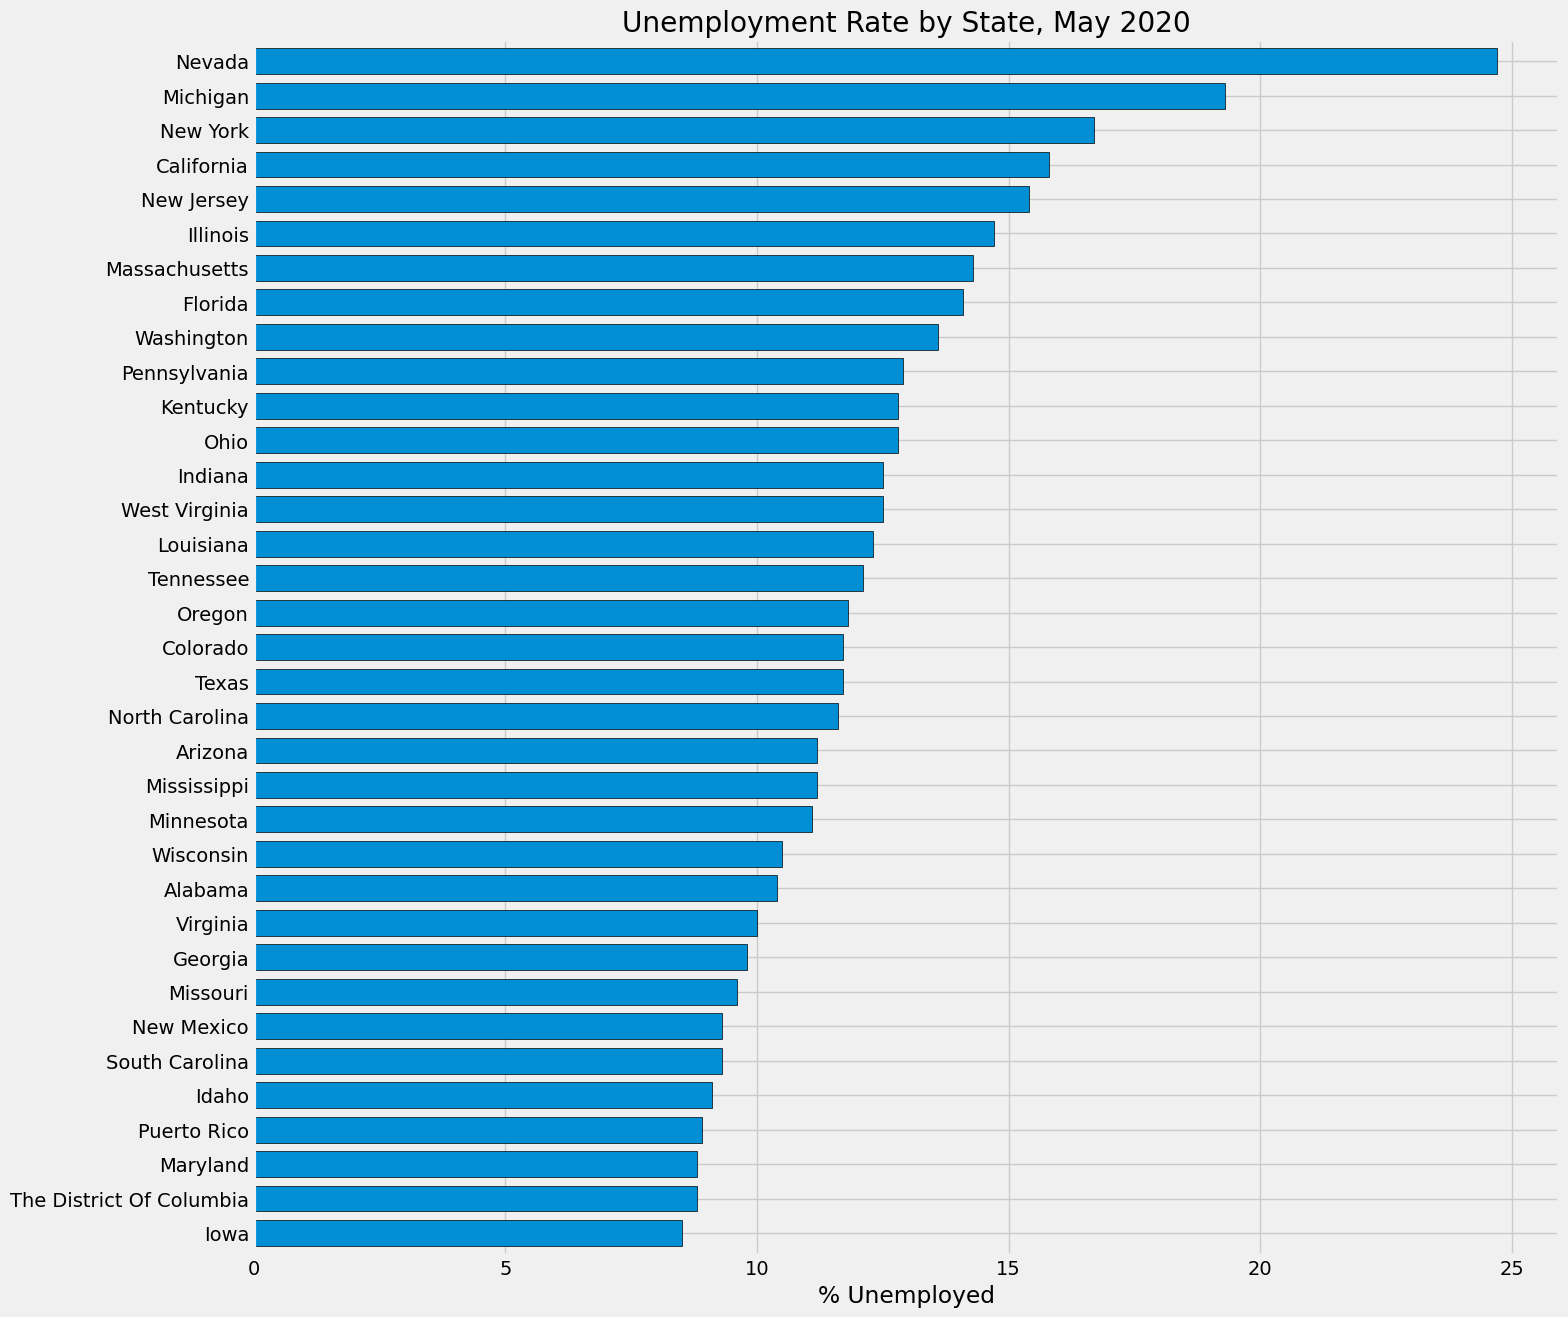

In [112]:
ax = uemp_states.loc[uemp_states.index == "2020-05"].T \
    .sort_values(by="2020-05-01") \
    .plot(kind="barh", figsize=(15, 15), width=0.75, edgecolor="black",
          title="Unemployment Rate by State, May 2020")

ax.legend().remove()
ax.set_xlabel("% Unemployed")
plt.show()
    

# Pull Participation Rate

In [115]:
part_df = fred.search("participation rate state", filter=("frequency", "Monthly"))
part_df = part_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")

In [172]:
part_rows_to_include = part_df.index.str.contains("LBSS")
part_rows_to_exclude = part_df.loc[~part_rows_to_include].index

In [188]:
part_state_df = part_df.loc[part_rows_to_include].copy()

In [189]:
part_id_to_state = part_state_df["title"].str.replace("Labor Force Participation Rate for ", "").str.strip().str.title().to_dict()

In [190]:
all_participation_results = []

for myid in part_state_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_participation_results.append(results)

In [361]:
part_states = pd.concat(all_participation_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [362]:
part_states

,California,Texas,Florida,Georgia,West Virginia,Wisconsin,Michigan,Virginia,Alabama,Massachusetts,New Mexico,Ohio,New York,Louisiana,Mississippi,Colorado,Utah,Pennsylvania,North Carolina,Maryland,Illinois,Arkansas,Washington,Arizona,Missouri,Tennessee,South Carolina,Minnesota,Indiana,Kentucky,Oklahoma,Iowa,New Jersey,New Hampshire,Wyoming,Connecticut,Oregon,Nebraska,Maine,Kansas,Alaska,Nevada,Rhode Island,Hawaii,Idaho,Montana,South Dakota,North Dakota,Delaware,Vermont,District Of Columbia
1976-01-01,62.5,63.7,55.8,63.8,52.5,65.6,61.6,65.9,57.1,64.8,60.6,61.7,58.1,56.9,58.8,67.3,62.8,58.4,66.6,64.3,63.1,57.9,61.0,59.5,60.5,59.7,65.3,65.5,64.0,60.5,59.4,64.4,61.5,65.8,65.3,64.1,63.0,64.7,62.1,65.2,69.3,71.4,63.8,69.9,63.1,62.5,64.8,62.7,62.7,63.7,64.4
1976-02-01,62.4,63.5,55.6,63.6,52.4,65.5,61.5,65.7,56.9,64.7,60.4,61.6,58.0,56.7,58.6,67.1,62.6,58.3,66.4,64.1,63.0,57.8,60.8,59.2,60.4,59.5,65.2,65.4,63.9,60.3,59.3,64.3,61.4,65.6,65.0,64.0,62.8,64.6,61.9,65.1,68.6,70.8,63.7,69.7,62.9,62.4,64.7,62.5,62.6,63.5,64.5
1976-03-01,62.2,63.3,55.5,63.5,52.3,65.5,61.5,65.5,56.8,64.6,60.2,61.6,58.0,56.5,58.5,66.9,62.5,58.3,66.3,64.1,62.9,57.8,60.6,59.1,60.3,59.4,65.0,65.3,63.8,60.2,59.2,64.2,61.4,65.5,64.8,63.9,62.6,64.6,61.9,65.0,68.1,70.5,63.7,69.6,62.8,62.3,64.6,62.4,62.6,63.4,64.6
1976-04-01,62.2,63.4,55.4,63.6,52.3,65.5,61.6,65.4,56.8,64.6,60.1,61.6,58.0,56.5,58.5,66.7,62.5,58.3,66.3,64.1,62.9,57.7,60.7,59.1,60.4,59.3,64.9,65.3,63.8,60.2,59.1,64.1,61.5,65.6,65.0,64.1,62.5,64.6,61.8,65.1,68.2,70.5,63.7,69.4,62.8,62.1,64.6,62.5,62.5,63.6,64.6
1976-05-01,62.2,63.6,55.3,63.6,52.2,65.6,61.7,65.4,56.8,64.6,60.2,61.5,58.1,56.5,58.5,66.5,62.6,58.3,66.3,64.1,63.0,57.8,60.9,59.2,60.6,59.4,64.7,65.5,63.9,60.1,59.0,64.1,61.6,66.0,65.2,64.3,62.6,64.6,61.7,65.2,68.2,70.6,63.7,69.3,62.9,62.0,64.6,62.6,62.5,63.7,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,62.1,64.8,58.0,60.9,54.3,65.6,62.0,65.5,57.8,66.6,57.8,62.6,60.9,57.9,56.1,67.8,68.3,61.6,59.7,64.9,64.9,58.4,62.9,61.5,63.4,59.6,57.5,68.2,63.7,58.4,62.6,67.0,63.9,65.8,62.9,64.9,62.7,69.2,60.2,67.1,65.0,62.8,63.9,60.4,63.7,62.4,68.8,69.5,58.9,65.3,72.4
2025-04-01,62.2,64.9,58.0,60.8,54.3,65.5,62.0,65.4,58.0,66.7,57.8,62.7,61.0,57.9,56.2,67.8,68.2,61.6,59.6,64.8,64.9,58.4,62.7,61.5,63.4,59.7,57.5,68.2,63.7,58.4,62.7,67.2,63.9,65.7,62.5,65.0,62.7,69.2,60.1,67.1,65.2,62.9,63.8,60.5,63.6,62.3,68.9,69.5,58.9,65.1,72.4
2025-05-01,62.3,64.9,57.9,60.7,54.3,65.3,61.9,65.2,58.0,66.9,57.8,62.7,61.0,57.9,56.2,67.7,68.1,61.6,59.5,64.8,64.7,58.4,62.5,61.4,63.5,59.8,57.5,68.2,63.7,58.4,62.7,67.3,63.8,65.7,62.2,65.0,62.7,69.3,60.0,67.0,65.2,63.0,63.7,60.6,63.5,62.2,68.8,69.5,59.0,65.0,72.2
2025-06-01,62.4,64.8,57.8,60.6,54.3,65.1,61.7,65.0,58.0,66.9,57.8,62.7,60.9,58.0,56.0,67.7,68.0,61.5,59.4,64.7,64.6,58.4,62.3,61.4,63.5,59.8,57.6,68.2,63.7,58.4,62.7,67.4,63.7,65.6,62.0,64.8,62.7,69.4,59.9,67.0,65.2,63.0,63.6,60.6,63.4,62.1,68.8,69.5,58.9,64.9,72.1


In [363]:
uemp_states

,California,Texas,New York,Florida,Virginia,Michigan,Ohio,Alabama,Pennsylvania,Massachusetts,Georgia,Illinois,North Carolina,Colorado,New Jersey,Nevada,Wisconsin,Washington,Oregon,Arizona,Tennessee,Kentucky,Idaho,South Carolina,Indiana,Minnesota,Louisiana,West Virginia,New Mexico,Maryland,Iowa,Missouri,Mississippi
1976-01-01,9.2,5.8,10.3,9.6,6.0,9.9,8.1,6.7,8.1,10.6,8.4,6.6,6.5,5.8,10.2,9.2,5.8,8.5,9.5,10.2,6.0,5.6,5.6,7.3,6.6,5.9,6.3,7.4,8.6,6.5,4.4,6.0,6.6
1976-02-01,9.2,5.8,10.3,9.7,6.0,9.9,8.1,6.6,8.1,10.6,8.4,6.6,6.5,5.8,10.2,9.2,5.8,8.5,9.5,10.2,6.0,5.6,5.6,7.3,6.6,5.9,6.3,7.4,8.6,6.5,4.4,6.0,6.6
1976-03-01,9.1,5.9,10.2,9.6,6.0,9.9,8.1,6.6,8.1,10.6,8.3,6.6,6.5,5.7,10.2,9.2,5.8,8.5,9.4,10.2,6.0,5.6,5.6,7.3,6.5,5.8,6.3,7.4,8.6,6.5,4.4,6.0,6.6
1976-04-01,9.0,5.9,10.2,9.5,5.9,9.8,7.9,6.5,8.1,10.4,8.2,6.6,6.3,5.6,10.3,9.0,5.7,8.5,9.3,10.0,6.0,5.6,5.6,7.1,6.3,5.7,6.4,7.4,8.6,6.5,4.3,6.0,6.4
1976-05-01,8.9,6.0,10.2,9.3,5.8,9.6,7.8,6.4,8.1,10.1,8.1,6.6,6.1,5.6,10.3,8.8,5.6,8.5,9.1,9.8,5.9,5.5,5.6,7.0,6.0,5.6,6.5,7.4,8.6,6.6,4.2,6.0,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,5.3,4.1,4.2,3.6,3.2,5.5,4.8,3.3,3.8,4.4,3.6,4.8,3.7,4.8,4.7,5.7,3.2,4.4,4.6,4.1,3.6,5.2,3.7,4.1,4.1,3.1,4.4,3.8,4.3,3.0,3.4,3.8,3.9
2025-04-01,5.3,4.1,4.2,3.7,3.3,5.5,4.9,3.3,3.9,4.6,3.6,4.8,3.7,4.8,4.8,5.6,3.3,4.4,4.7,4.1,3.5,5.2,3.7,4.2,3.9,3.2,4.4,3.8,4.3,3.1,3.5,3.9,4.0
2025-05-01,5.3,4.1,4.0,3.7,3.4,5.4,4.9,3.3,3.9,4.8,3.5,4.8,3.7,4.8,4.8,5.5,3.3,4.5,4.8,4.1,3.5,5.0,3.6,4.1,3.7,3.3,4.5,3.7,4.2,3.2,3.6,4.0,4.0
2025-06-01,5.4,4.0,4.0,3.7,3.5,5.3,4.9,3.2,4.0,4.8,3.5,4.6,3.7,4.7,4.9,5.4,3.2,4.5,4.9,4.1,3.5,4.9,3.6,4.1,3.6,3.3,4.5,3.7,4.2,3.3,3.7,4.0,4.0


# Plot Unemployment vs Participation

In [367]:
part_states = part_states.rename(columns={'District Of Columbia': 'The District Of Columbia'})

In [368]:
part_states = part_states.loc[:, part_states.columns.isin(uemp_states.columns)]
part_states

,California,Texas,Florida,Georgia,West Virginia,Wisconsin,Michigan,Virginia,Alabama,Massachusetts,New Mexico,Ohio,New York,Louisiana,Mississippi,Colorado,Pennsylvania,North Carolina,Maryland,Illinois,Washington,Arizona,Missouri,Tennessee,South Carolina,Minnesota,Indiana,Kentucky,Iowa,New Jersey,Oregon,Nevada,Idaho
1976-01-01,62.5,63.7,55.8,63.8,52.5,65.6,61.6,65.9,57.1,64.8,60.6,61.7,58.1,56.9,58.8,67.3,58.4,66.6,64.3,63.1,61.0,59.5,60.5,59.7,65.3,65.5,64.0,60.5,64.4,61.5,63.0,71.4,63.1
1976-02-01,62.4,63.5,55.6,63.6,52.4,65.5,61.5,65.7,56.9,64.7,60.4,61.6,58.0,56.7,58.6,67.1,58.3,66.4,64.1,63.0,60.8,59.2,60.4,59.5,65.2,65.4,63.9,60.3,64.3,61.4,62.8,70.8,62.9
1976-03-01,62.2,63.3,55.5,63.5,52.3,65.5,61.5,65.5,56.8,64.6,60.2,61.6,58.0,56.5,58.5,66.9,58.3,66.3,64.1,62.9,60.6,59.1,60.3,59.4,65.0,65.3,63.8,60.2,64.2,61.4,62.6,70.5,62.8
1976-04-01,62.2,63.4,55.4,63.6,52.3,65.5,61.6,65.4,56.8,64.6,60.1,61.6,58.0,56.5,58.5,66.7,58.3,66.3,64.1,62.9,60.7,59.1,60.4,59.3,64.9,65.3,63.8,60.2,64.1,61.5,62.5,70.5,62.8
1976-05-01,62.2,63.6,55.3,63.6,52.2,65.6,61.7,65.4,56.8,64.6,60.2,61.5,58.1,56.5,58.5,66.5,58.3,66.3,64.1,63.0,60.9,59.2,60.6,59.4,64.7,65.5,63.9,60.1,64.1,61.6,62.6,70.6,62.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,62.1,64.8,58.0,60.9,54.3,65.6,62.0,65.5,57.8,66.6,57.8,62.6,60.9,57.9,56.1,67.8,61.6,59.7,64.9,64.9,62.9,61.5,63.4,59.6,57.5,68.2,63.7,58.4,67.0,63.9,62.7,62.8,63.7
2025-04-01,62.2,64.9,58.0,60.8,54.3,65.5,62.0,65.4,58.0,66.7,57.8,62.7,61.0,57.9,56.2,67.8,61.6,59.6,64.8,64.9,62.7,61.5,63.4,59.7,57.5,68.2,63.7,58.4,67.2,63.9,62.7,62.9,63.6
2025-05-01,62.3,64.9,57.9,60.7,54.3,65.3,61.9,65.2,58.0,66.9,57.8,62.7,61.0,57.9,56.2,67.7,61.6,59.5,64.8,64.7,62.5,61.4,63.5,59.8,57.5,68.2,63.7,58.4,67.3,63.8,62.7,63.0,63.5
2025-06-01,62.4,64.8,57.8,60.6,54.3,65.1,61.7,65.0,58.0,66.9,57.8,62.7,60.9,58.0,56.0,67.7,61.5,59.4,64.7,64.6,62.3,61.4,63.5,59.8,57.6,68.2,63.7,58.4,67.4,63.7,62.7,63.0,63.4


In [369]:
uemp_states = uemp_states.loc[:, uemp_states.columns.isin(part_states.columns)]
uemp_states

,California,Texas,New York,Florida,Virginia,Michigan,Ohio,Alabama,Pennsylvania,Massachusetts,Georgia,Illinois,North Carolina,Colorado,New Jersey,Nevada,Wisconsin,Washington,Oregon,Arizona,Tennessee,Kentucky,Idaho,South Carolina,Indiana,Minnesota,Louisiana,West Virginia,New Mexico,Maryland,Iowa,Missouri,Mississippi
1976-01-01,9.2,5.8,10.3,9.6,6.0,9.9,8.1,6.7,8.1,10.6,8.4,6.6,6.5,5.8,10.2,9.2,5.8,8.5,9.5,10.2,6.0,5.6,5.6,7.3,6.6,5.9,6.3,7.4,8.6,6.5,4.4,6.0,6.6
1976-02-01,9.2,5.8,10.3,9.7,6.0,9.9,8.1,6.6,8.1,10.6,8.4,6.6,6.5,5.8,10.2,9.2,5.8,8.5,9.5,10.2,6.0,5.6,5.6,7.3,6.6,5.9,6.3,7.4,8.6,6.5,4.4,6.0,6.6
1976-03-01,9.1,5.9,10.2,9.6,6.0,9.9,8.1,6.6,8.1,10.6,8.3,6.6,6.5,5.7,10.2,9.2,5.8,8.5,9.4,10.2,6.0,5.6,5.6,7.3,6.5,5.8,6.3,7.4,8.6,6.5,4.4,6.0,6.6
1976-04-01,9.0,5.9,10.2,9.5,5.9,9.8,7.9,6.5,8.1,10.4,8.2,6.6,6.3,5.6,10.3,9.0,5.7,8.5,9.3,10.0,6.0,5.6,5.6,7.1,6.3,5.7,6.4,7.4,8.6,6.5,4.3,6.0,6.4
1976-05-01,8.9,6.0,10.2,9.3,5.8,9.6,7.8,6.4,8.1,10.1,8.1,6.6,6.1,5.6,10.3,8.8,5.6,8.5,9.1,9.8,5.9,5.5,5.6,7.0,6.0,5.6,6.5,7.4,8.6,6.6,4.2,6.0,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,5.3,4.1,4.2,3.6,3.2,5.5,4.8,3.3,3.8,4.4,3.6,4.8,3.7,4.8,4.7,5.7,3.2,4.4,4.6,4.1,3.6,5.2,3.7,4.1,4.1,3.1,4.4,3.8,4.3,3.0,3.4,3.8,3.9
2025-04-01,5.3,4.1,4.2,3.7,3.3,5.5,4.9,3.3,3.9,4.6,3.6,4.8,3.7,4.8,4.8,5.6,3.3,4.4,4.7,4.1,3.5,5.2,3.7,4.2,3.9,3.2,4.4,3.8,4.3,3.1,3.5,3.9,4.0
2025-05-01,5.3,4.1,4.0,3.7,3.4,5.4,4.9,3.3,3.9,4.8,3.5,4.8,3.7,4.8,4.8,5.5,3.3,4.5,4.8,4.1,3.5,5.0,3.6,4.1,3.7,3.3,4.5,3.7,4.2,3.2,3.6,4.0,4.0
2025-06-01,5.4,4.0,4.0,3.7,3.5,5.3,4.9,3.2,4.0,4.8,3.5,4.6,3.7,4.7,4.9,5.4,3.2,4.5,4.9,4.1,3.5,4.9,3.6,4.1,3.6,3.3,4.5,3.7,4.2,3.3,3.7,4.0,4.0


In [370]:
part_states.shape, uemp_states.shape

((595, 33), (593, 33))

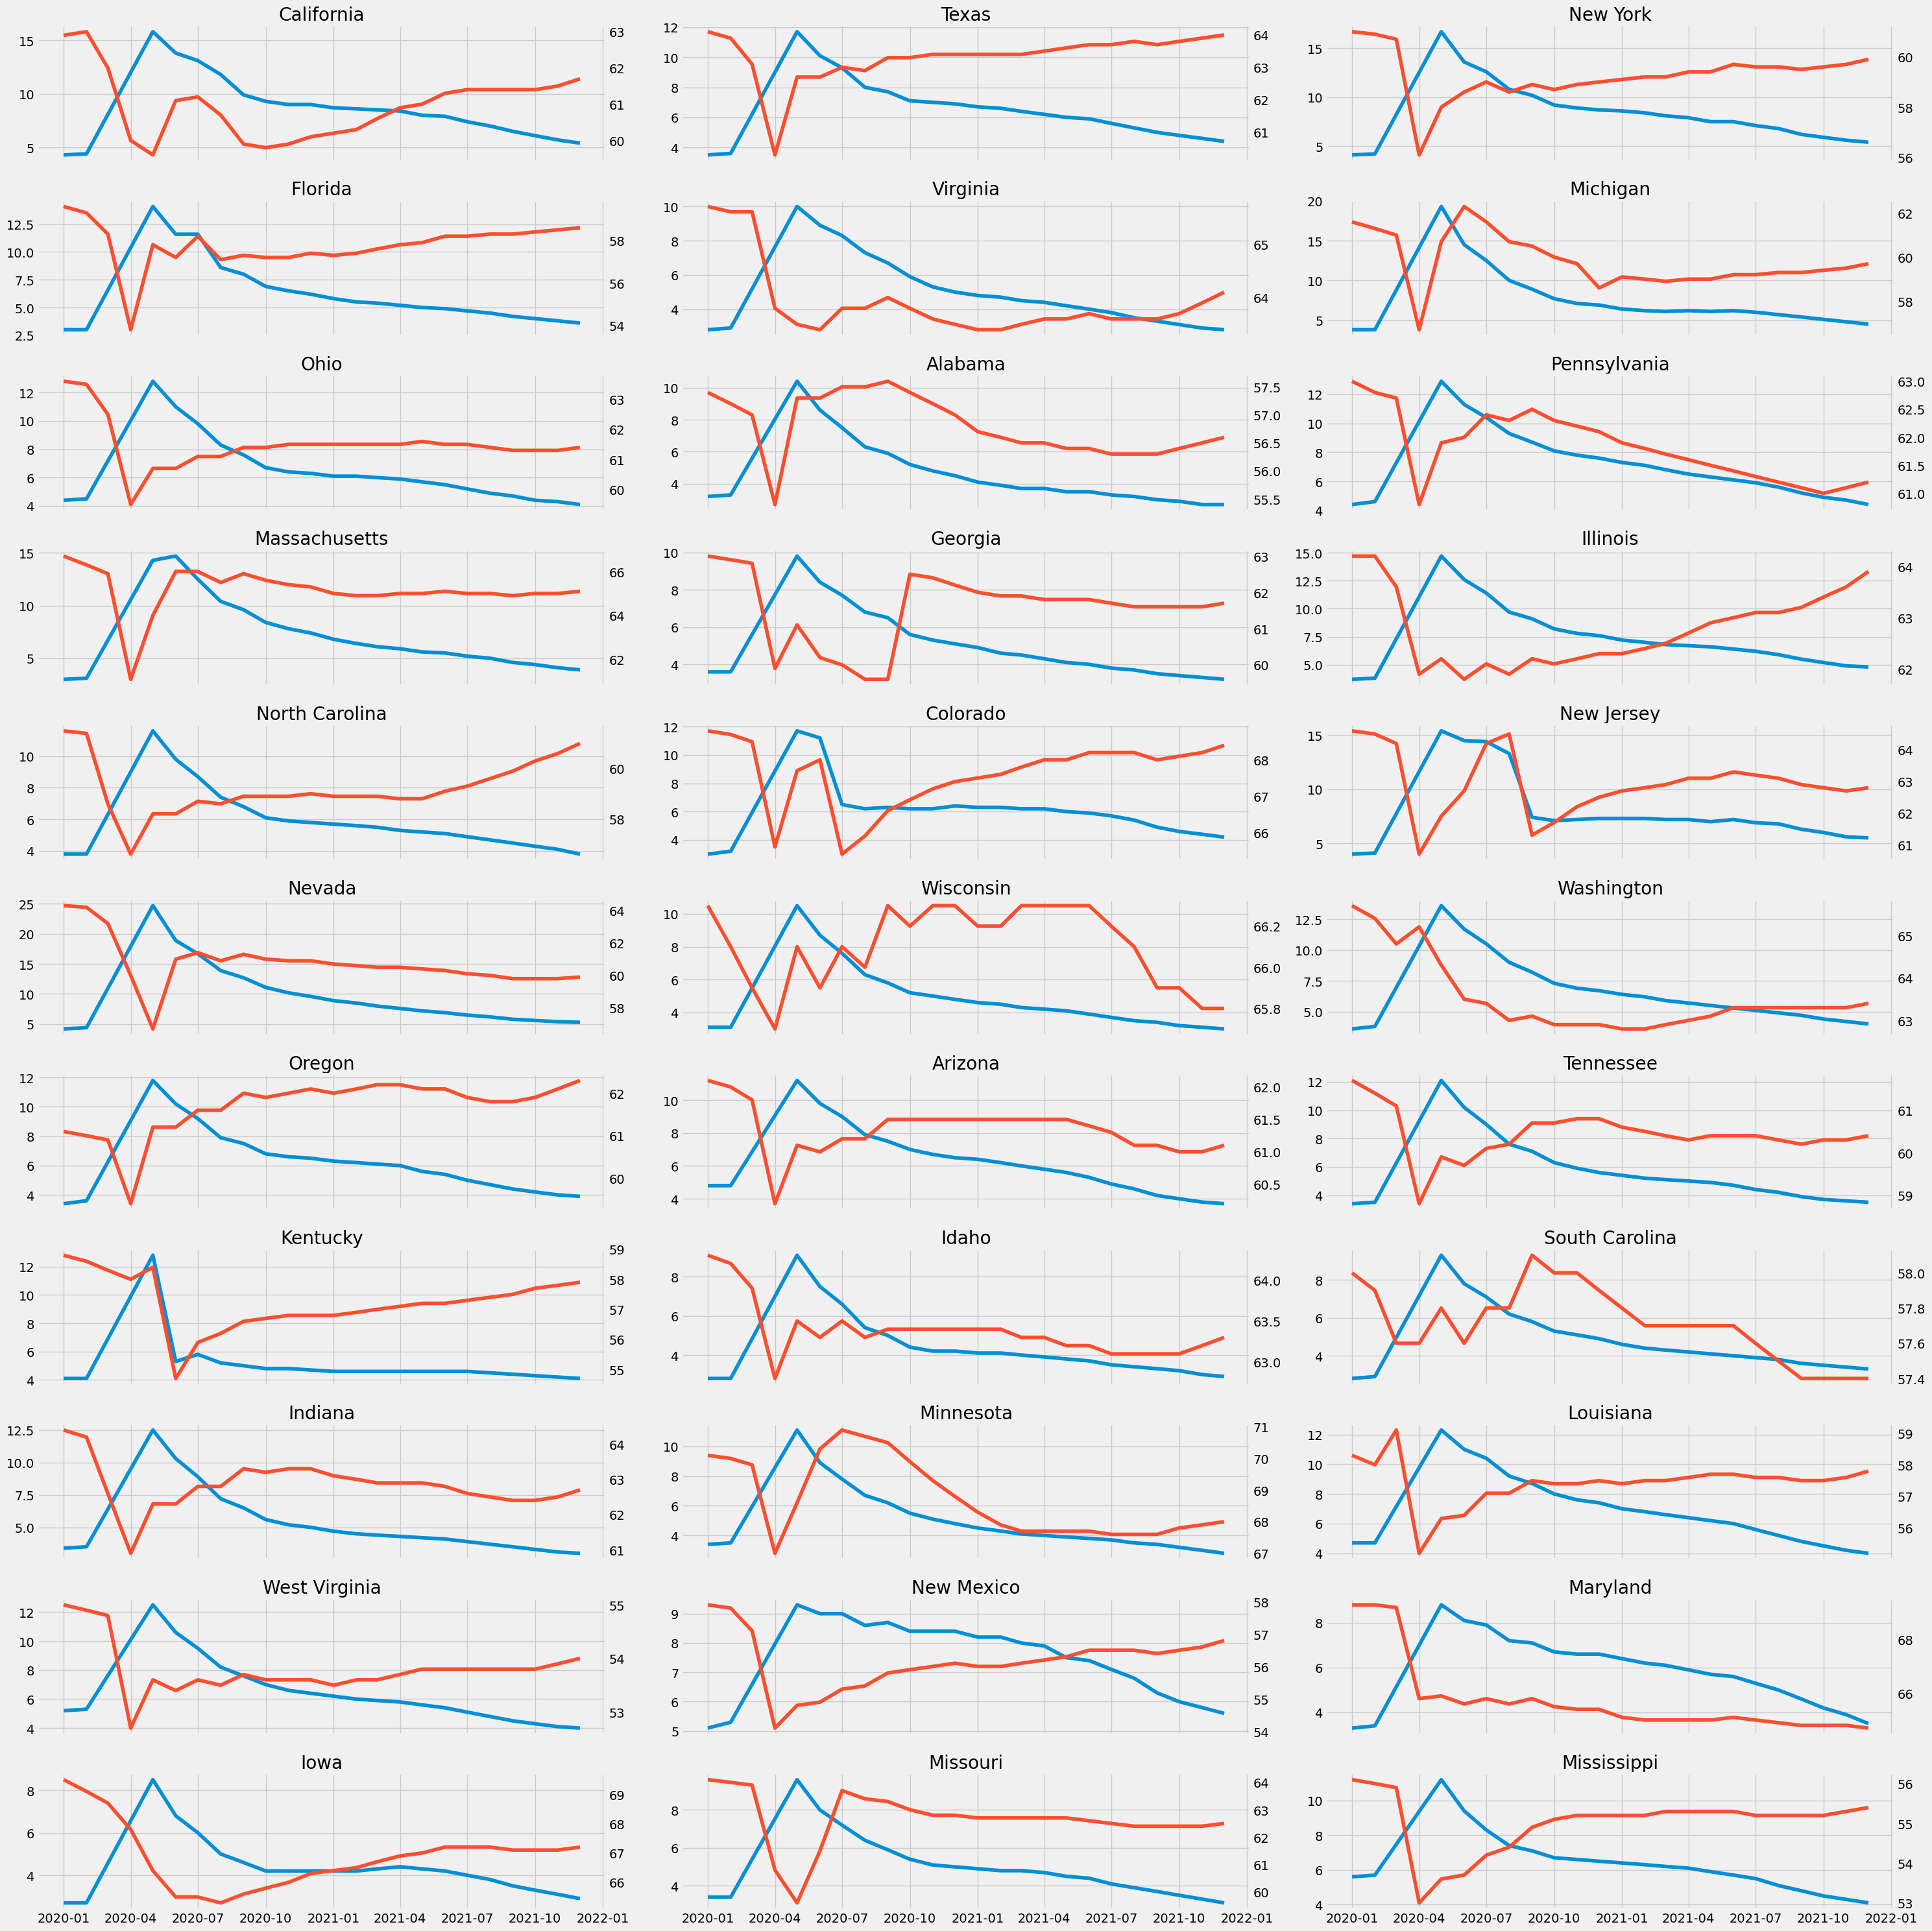

In [374]:
fig, axes = plt.subplots(11, 3, figsize=(30, 30), sharex=True)
axes = axes.flatten()

i = 0
for state in uemp_states.columns:
    ax2 = axes[i].twinx()

    axes[i].plot(
        uemp_states.query("index >= 2020 and index < 2022")[state],
        label="Unemployment"
    )

    ax2.plot(
        part_states.query("index >= 2020 and index < 2022")[state],
        label="Participation",
        color=color_pal[1]
    )

    ax2.grid(False)
    axes[i].set_title(state)
    i += 1

plt.tight_layout()
plt.show()